# Random Forest w/ Titanic Use Case

Using a sample dataset of the passagers of the Titanic w/ their characteristics at that moment as the training dataset, we would like to predict which passangers survived with a random forest machine learning model. The aim of the project is to design a security protocol for future transatlantic trips.

You can introduce any comments, analysis and visualizations.

## Imports:

You can use as many libraries as you need

In [472]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from treeinterpreter import treeinterpreter as ti
import matplotlib.pyplot as plt
import random

## 1. Read and Visualize Data:

In [473]:
df = pd.read_csv('./titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [474]:
print(df.shape)
df.info()
df.isnull().sum()

(887, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### Name

In [475]:
df = df.drop(['Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


We drop the whole male attribute. We could leave only the familly name (only trully usefull data) but it would be a non worth-solving problem when converting it to one-hot encoding.

### PClass

In [476]:
pclass_1 = df[df['Pclass'] == 1]
pclass_2 = df[df['Pclass'] == 2]
pclass_3 = df[df['Pclass'] == 3]

In [477]:
print('-------- Passanger Class 1 Fare info --------')
print(pclass_1['Fare'].describe())
print('-------- Passanger Class 2 Fare info --------')
print(pclass_2['Fare'].describe())
print('-------- Passanger Class 3 Fare info --------')
print(pclass_3['Fare'].describe())

-------- Passanger Class 1 Fare info --------
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
-------- Passanger Class 2 Fare info --------
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
-------- Passanger Class 3 Fare info --------
count    487.000000
mean      13.707707
std       11.817309
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


We can see how the fare's prices are most likely related to the passenger's class.

In [478]:
df.groupby('Survived').count()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,
0,545,545,545,545,545,545
1,342,342,342,342,342,342


In [479]:
pclass_1.groupby('Survived').count()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,
0,80,80,80,80,80,80
1,136,136,136,136,136,136


In [480]:
pclass_2.groupby('Survived').count()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,
0,97,97,97,97,97,97
1,87,87,87,87,87,87


In [481]:
pclass_3.groupby('Survived').count()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,
0,368,368,368,368,368,368
1,119,119,119,119,119,119


The ammount of passengers within the same class that survived is also quite revelative

### Age

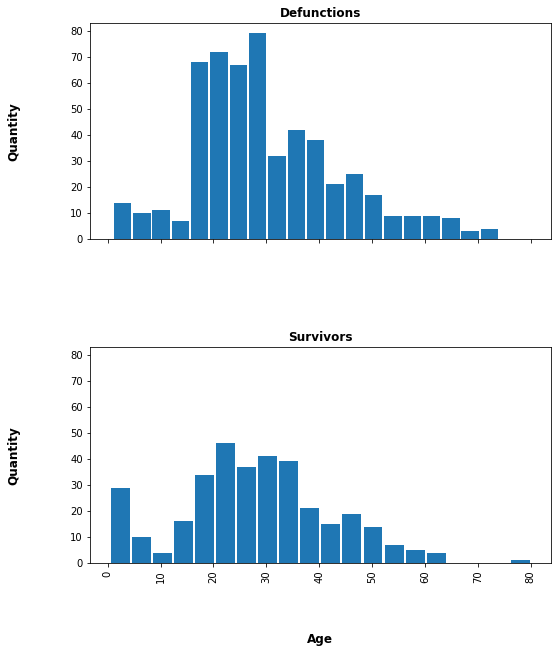

In [482]:
fig = df.hist(column='Age', bins=20, figsize=(8,10), layout=(2,1), by='Survived', sharex=True, sharey=True, zorder=2, rwidth=0.9)
#Set plot labels
for i,x in enumerate(fig):
    x.set_xlabel('Age', labelpad=50, weight='bold', size=12)
    x.set_ylabel('Quantity', labelpad=50, weight='bold', size=12)
    if i == 0:
        x.set_title('Defunctions', weight='bold', size=12)
    else:
        x.set_title('Survivors', weight='bold', size=12)

We can't find any general relation between age and survival rate with a couple specific exeptions.

### Sex

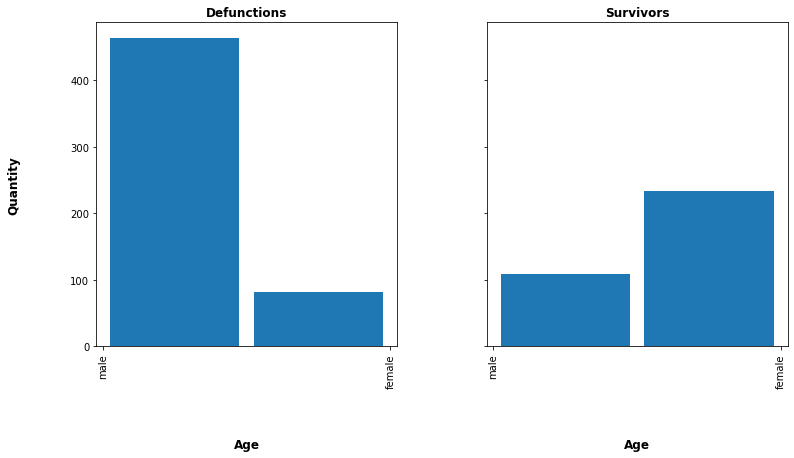

In [483]:
fig = df.hist(column='Sex', bins=2, figsize=(12,6), layout=(1,2), by='Survived', sharex=True, sharey=True, zorder=2, rwidth=0.9)
#Set plot labels
for i,x in enumerate(fig):
    x.set_xlabel('Age', labelpad=50, weight='bold', size=12)
    x.set_ylabel('Quantity', labelpad=50, weight='bold', size=12)
    if i == 0:
        x.set_title('Defunctions', weight='bold', size=12)
    else:
        x.set_title('Survivors', weight='bold', size=12)

We observe females had a clearly greater suvival ratio than males.

### Fare

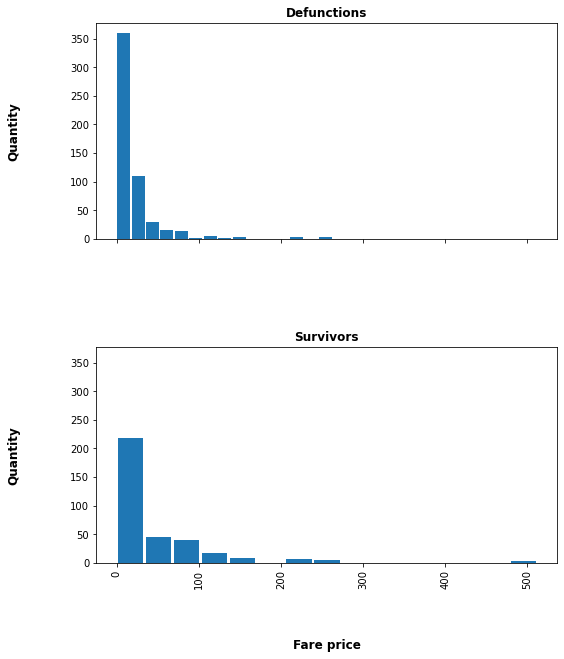

In [484]:
fig = df.hist(column='Fare', bins=15, figsize=(8,10), layout=(2,1), by='Survived', sharex=True, sharey=True, zorder=2, rwidth=0.9)
#Set plot labels
for i,x in enumerate(fig):
    x.set_xlabel('Fare price', labelpad=50, weight='bold', size=12)
    x.set_ylabel('Quantity', labelpad=50, weight='bold', size=12)
    if i == 0:
        x.set_title('Defunctions', weight='bold', size=12)
    else:
        x.set_title('Survivors', weight='bold', size=12)

In [485]:
buckets= 0.1*np.arange(0,11)

groups = df.groupby(['Survived', pd.qcut(df.Fare, buckets)])
groups = groups.size().unstack()
groups

Fare,"(-0.001, 7.55]","(7.55, 7.858]","(7.858, 8.05]","(8.05, 10.5]","(10.5, 14.454]","(14.454, 22.225]","(22.225, 27.721]","(27.721, 39.688]","(39.688, 77.958]","(77.958, 512.329]"
Survived,,,,,,,,,,
0,79,60,85,60,48,50,47,53,42,21
1,13,26,19,18,36,38,46,33,47,66


Text(0, 0.5, 'Quantity')

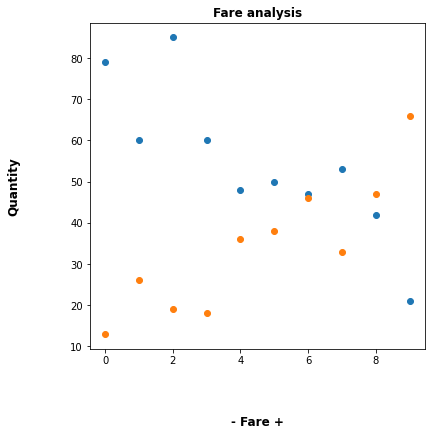

In [486]:
intervals = np.arange(0,10)

# Plot fare survival intervals
fig = plt.figure(figsize=(6,6))
plt.scatter(intervals, groups.iloc[0], label='Defunctions')
plt.scatter(intervals, groups.iloc[1], label='Survivors')
plt.title('Fare analysis', weight='bold', size=12)
plt.xlabel('- Fare +', labelpad=50, weight='bold', size=12)
plt.ylabel('Quantity', labelpad=50, weight='bold', size=12)

We can sense some kind of positive correlation when measuring the ammount of survivors for each range of fare prices.

### + Conclusions

The dataset we are using describes a list of Titanic passengers and labels them based on wether they survived to it's crashing or not. There isn't any Nan value in the whole dataset and it's size is big enough to get reasonably good results.

First, the name colummn has been dropped. We could edit it and only retain the familly name as I think it is the only part we could extract info from but the huge ammount of different categories would cause serious trouble.

The passengers are devided in three classes. If we compare the fares of the three different passenger classes we can predict the passengers are divided into classes based on how expensive their fares were, being class 3 the cheapest and class 1 the most expensive. We can also see how based on prices there is a larger average fare gap between class 2 and 3 than between class 1 and 2. Finally, class 3 is the most populated with a bit more than half the entries belonging to it, followed by class 1 with roughly one forth of the entries, ending with class 2 with the remaining entries.

Doing some fast calculations, we get than from the whole list of 887 passengers, the survival ratio is of **0.39**. If we check the same value for classes 3 to 1 we get survival ratios of **0.24**, **0.47** and **0.63** respectively.

This is what we get if we do some more broad observations based on some histograms: 
There isn't a general correlation between age and survival ratio but if we look closely we can see the ammount of recently born children that survived is pretty large compared to the ammount that did not. We find the lowest ratio of survival in the ages between **15** and **30**.

What refers to the sex of the passangers we clearly see a difference between genres. The ammount of men that didn't survived is hugely greater than the ammount of women that suffered the same fate. In the ammount of passengers that survived we find the oposite tendency. The ammount of women that survived is quite greater than the ammount of men that did.

To close this section, comparing the passengers that survived to the ones that did not based on fares we observe that if we group them in equally sized bins the chances of survival are greater the bigger the fares are. The opposite happens with defunctions. The bigger the fares, the lowest the chances of survival.

We save possible esplanation of why these things are happening for the final conclusions.

## 2. Train Dataset:

### Final preparation

Before starting the training we still have to transform the categorical data into numeric

In [487]:
# Converting Sex variable to one-hot encoding
sex = pd.get_dummies(df['Sex'], drop_first=True)

# Converting pClass variable to one-hot encoding
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
pclass = pclass.rename(columns={2: 'Pclass2', 3: 'Pclass3'})

# Concatenate all dataframes
new_df = pd.concat([df, sex, pclass], axis=1)
# Drop the repeated columns
new_df = new_df.drop(columns=['Pclass', 'Sex'])
new_df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,Pclass2,Pclass3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


### Divide the dataset

We divide the dataset in training and test

In [488]:
 # Separate the label/target variable
y = new_df.Survived
x = new_df.drop(columns=['Survived'], axis=1)

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [489]:
x.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,Pclass2,Pclass3
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,0
4,35.0,0,0,8.0500,1,0,1


In [490]:
# PARAMETERS
test_size = 0.2

In [491]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=10)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (709, 7)
x_test (178, 7)
y_train (709,)
y_test (178,)


### Train the model

In [492]:
# PARAMETERS
n_estimators = 80
criterion = 'entropy'

In [493]:
classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=10)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=10)

## 3. Evaluation and Test

### Predict Test Results

In [494]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)

### Confusion Matrix

In [495]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[101  11]
 [ 17  49]]


In [496]:
print("Test accuracy: ", classifier.score(x_test, y_test))
print("Train accuracy: ", classifier.score(x_train, y_train))

Test accuracy:  0.8426966292134831
Train accuracy:  0.9802538787023978


In [497]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       112
           1       0.82      0.74      0.78        66

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



We get a test accuracy of 0.84 which is quite good for the kind of problem we are dealing with. The precission is a little bit higher when classifying passengers that didn't survive but nothing too relatable. On the other hand we see that the recall is notably higher when classifying the passengers that didn't survive which means the model has more confidence when classifying a passenger as a defunction.

### Tree interpretation

In [498]:
prediction, bias, contributions = ti.predict(classifier, x_test)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTre

D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTre

In [499]:
print(prediction.shape, bias.shape, contributions.shape)

(178, 2) (178, 2) (178, 7, 2)


In [500]:
# Pick a random sample
idx = random.randrange(0, len(y_test))

# Analyse it's prediction process

print("Prediction Based on Bias & Contributions : %.2f"%np.argmax((bias[idx] + contributions[idx].sum(axis=0))))
print("Actual Target Value                      : %.2f"%y_test[y_test.index[idx]])
print("Target Value As Per Treeinterpreter      : %.2f"%np.argmax(prediction[idx]))

# Print contributions
attribute_names = x_test.columns
print("Contributions For Sample %s             : "%y_test.index[idx])
con = contributions[idx].tolist()
con.insert(0, bias[idx])
con = np.array(con)
con_df = pd.DataFrame(data=con, index=["Bias"] + attribute_names.tolist(), columns=["Contributions_0", "Contributions_1"])
pred = con_df[["Contributions_0", "Contributions_1"]].sum()
con_df.loc["Prediction"] = pred
con_df

Prediction Based on Bias & Contributions : 0.00
Actual Target Value                      : 0.00
Target Value As Per Treeinterpreter      : 0.00
Contributions For Sample 408             : 


,Contributions_0,Contributions_1
Bias,0.609185,3.908145e-01
Age,0.069902,-6.990169e-02
Siblings/Spouses Aboard,-0.000242,2.424152e-04
Parents/Children Aboard,0.007007,-7.006742e-03
Fare,0.150524,-1.505238e-01
male,0.123568,-1.235680e-01
Pclass2,0.003277,-3.277494e-03
Pclass3,0.036779,-3.677925e-02
Prediction,1.000000,-9.020562e-17


Treeinterpreter library allows as to approximate how the different attributes affect how the model classifies the samples. If we look at how each attribute contributes to the decission of whether a passenger survived or not to the Titanic we can extract interesting conclusions. 

First, we see that the model is clearly biased to classify any random passenger as a defunction. This is probably due to the fact that the crash was a disaster and more people died than survived. Besides the bias, the attribute that clearly contributes to every decission is the gender of the passenger. As we saw at the beginning, we find a clear difference between the ammount of deadly victims that were women versus the ones that were men. 

The second attribute that affect the most is the Fare's price (when not it is the passenger's class, attributes that as we saw are very related). This also corroborates the data that we saw before, which showed that higher the fare's price (or higher the passenger's class) the more probable the passenger was to survive. 

Finally, the third attribute tha contributes the most is the age, which, in fact affects specially in certain ranges. 

## Conclusions:

We have learned severall lllthings about what helped the passengers to survive Titanic's crash or doomed them instead. Clearly the gender key, but, although women had a clear tendency to survive mush more than men this is most probably just because women were priorized at the time of ship's evacuation. If we look for Titanic's crash report we read: "Sobre las 00:10 comienza la evacuación en los botes, ordenándose embarcar primero a mujeres y niños" (Link to the source below). That allowed them and their children to have higher survival chances.

Then we find the thing with fares and passenger classes. Probably the same happens here. Higher class passengers had a higher survival ratio either because they were prioritized at the evacuation time or they got to the main deck first because their cabins were in superior deck levels than the ones of lower class passengers.

If we return to the initial goal, how could we use the things we learned to design a security protocol for future transatlantic trips? Well, clearly the passengers that had higher chances of survival were the ones that were evacuated first. Then it makes sense to focus on building better evacuation pathways and improving the tools and protols of evacuation. I think how the passengers should be priorized is more of a moral question and should be discussed far more deeply. 